In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
titanic_data = pd.read_csv('datasets/titanic_train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

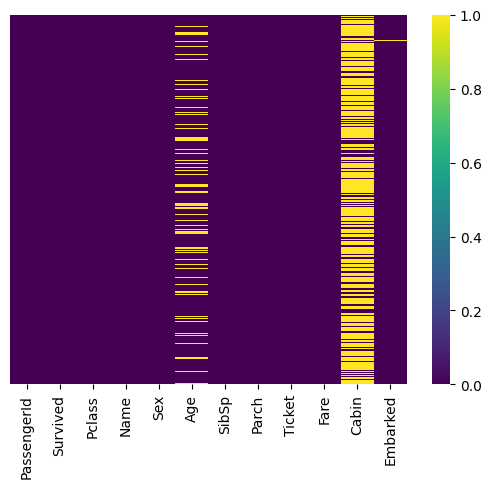

In [5]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=True, cmap='viridis')

/tmp/ipykernel_258767/719732134.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data, palette= 'RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

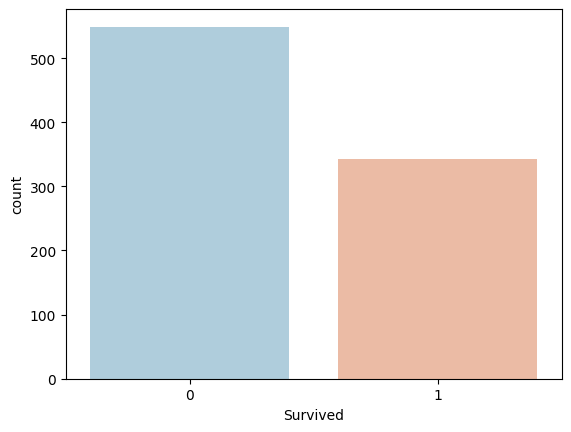

In [6]:
sns.countplot(x='Survived', data=titanic_data, palette= 'RdBu_r')

/tmp/ipykernel_258767/465246812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic_data, palette= 'RdBu_r')


<Axes: xlabel='Sex', ylabel='count'>

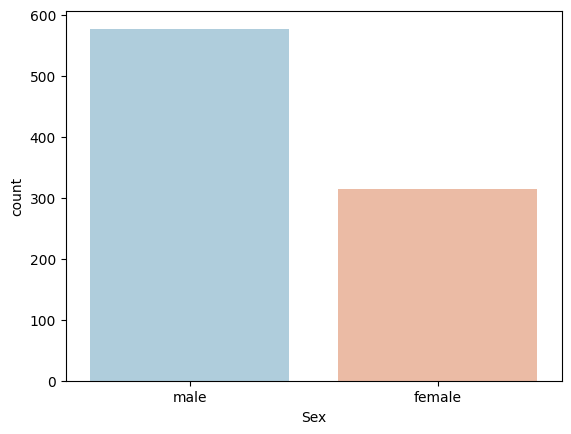

In [7]:
sns.countplot(x='Sex', data=titanic_data, palette= 'RdBu_r')

/tmp/ipykernel_258767/2625741483.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=titanic_data, palette= 'rainbow')


<Axes: xlabel='Pclass', ylabel='count'>

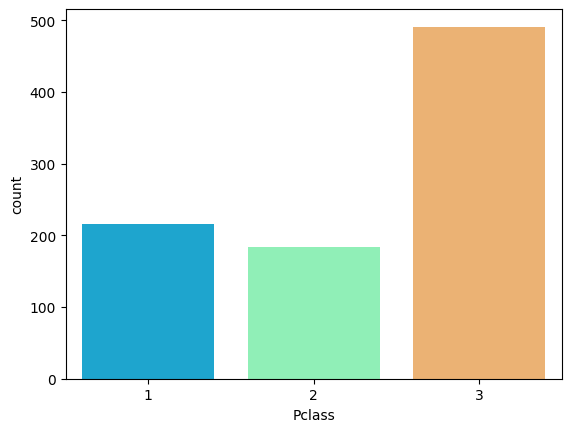

In [8]:
sns.countplot(x='Pclass', data=titanic_data, palette= 'rainbow')

<Axes: xlabel='Survived', ylabel='count'>

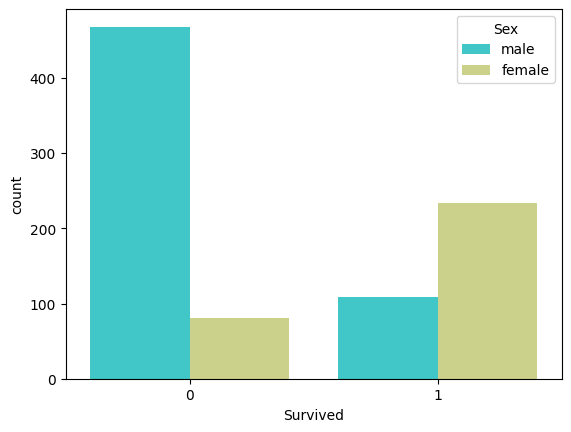

In [9]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data, palette='rainbow')

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


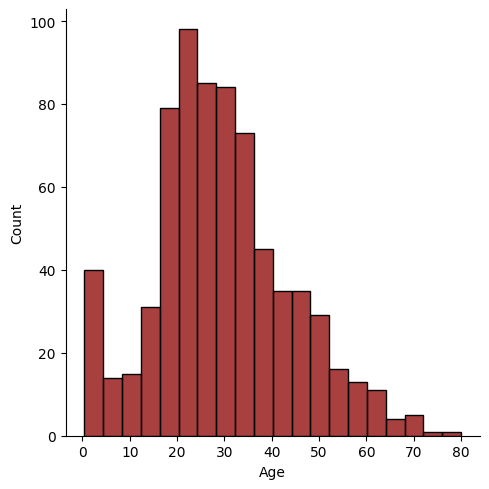

In [11]:
sns.displot(titanic_data['Age'].dropna(), color='darkred')

<Axes: xlabel='SibSp', ylabel='count'>

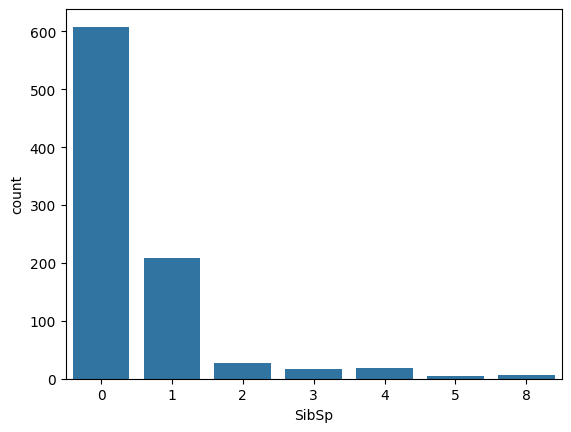

In [12]:
sns.countplot(x='SibSp', data=titanic_data)

<Axes: >

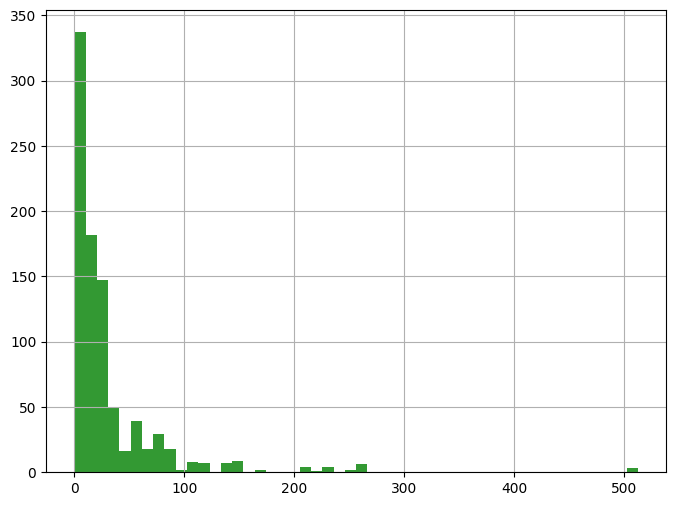

In [13]:
titanic_data['Fare'].hist(bins=50, color='green', alpha=0.8, figsize=(8, 6))

<Axes: xlabel='Pclass', ylabel='Age'>

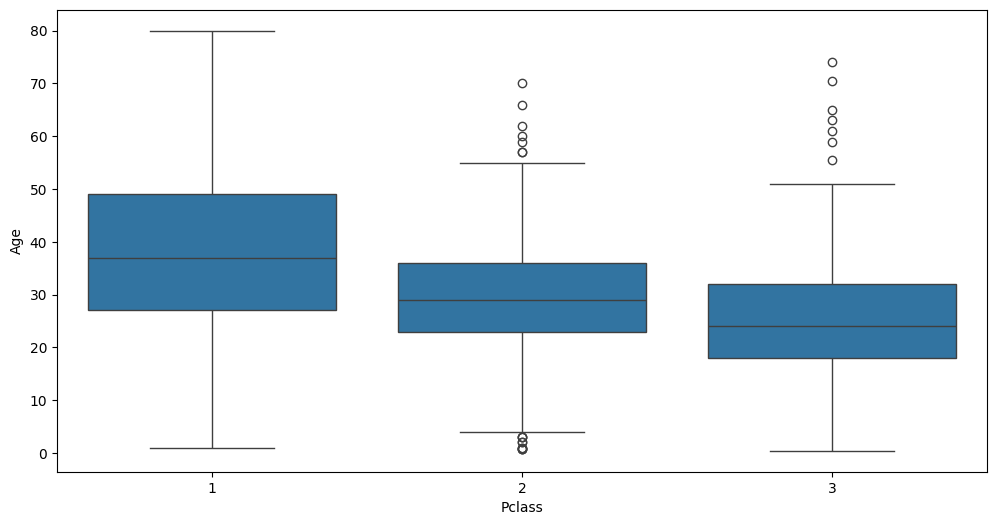

In [14]:
#box graphic
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y = 'Age', data= titanic_data)

In [15]:
avg_age = titanic_data.groupby('Pclass')[['Age']].mean()

In [16]:
avg_age

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [17]:
avg_age['Age'][2]

29.87763005780347

<Axes: >

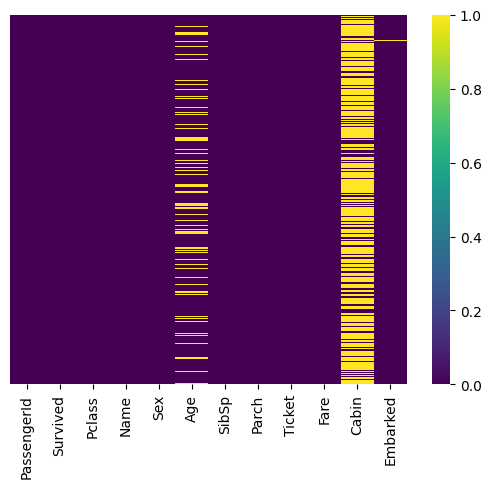

In [18]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [19]:
def impute_age(cols):
    
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age
        

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

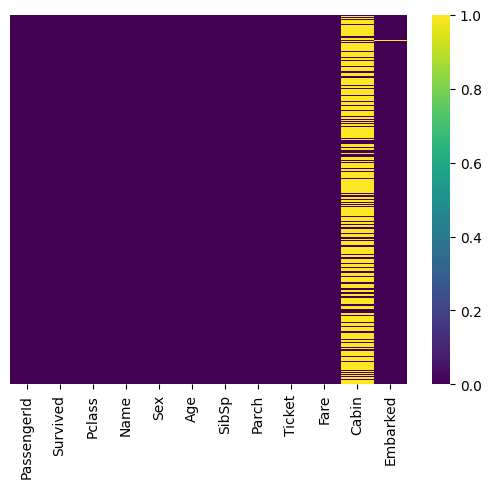

In [22]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [23]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
titanic_data.drop('Cabin', axis=1, inplace=True )

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

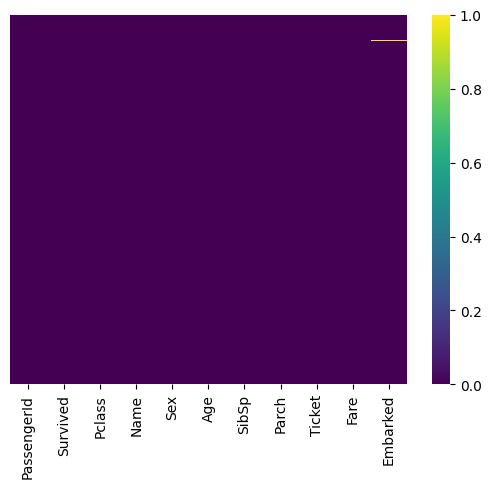

In [26]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [27]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [28]:
titanic_data = titanic_data.dropna()

In [29]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [30]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)

In [32]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [33]:
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)

In [34]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [35]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [37]:
titanic_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [38]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [39]:
type(sex)

pandas.core.frame.DataFrame

In [40]:
type(embark)

pandas.core.frame.DataFrame

In [41]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [42]:
titanic_data = pd.concat([titanic_data, sex, embark], axis=1)

In [43]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [44]:
y = titanic_data['Survived']

In [45]:
X = titanic_data.drop('Survived', axis=1)

In [46]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [47]:
# Split the data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 486 to 103
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  622 non-null    int64  
 1   Pclass       622 non-null    int64  
 2   Age          622 non-null    float64
 3   SibSp        622 non-null    int64  
 4   Parch        622 non-null    int64  
 5   Fare         622 non-null    float64
 6   male         622 non-null    bool   
 7   Q            622 non-null    bool   
 8   S            622 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 35.8 KB


In [51]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr_model = LogisticRegression(max_iter=1000)

In [73]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 281 to 430
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  267 non-null    int64  
 1   Pclass       267 non-null    int64  
 2   Age          267 non-null    float64
 3   SibSp        267 non-null    int64  
 4   Parch        267 non-null    int64  
 5   Fare         267 non-null    float64
 6   male         267 non-null    bool   
 7   Q            267 non-null    bool   
 8   S            267 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 15.4 KB


In [55]:
predictions = lr_model.predict(X_test)

In [56]:
predictions[:10]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [57]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
281,282,3,28.0,0,0,7.8542,True,False,True
435,436,1,14.0,1,2,120.0000,False,False,True
39,40,3,14.0,1,0,11.2417,False,False,False
418,419,2,30.0,0,0,13.0000,True,False,True
585,586,1,18.0,0,2,79.6500,False,False,True


In [58]:
type(predictions)

numpy.ndarray

In [59]:
predictions_df = pd.DataFrame(predictions)

In [60]:
predictions_df.head()

,0
0,0
1,1
2,1
3,0
4,1


In [61]:
predictions_df.columns = ['Predictions']

In [62]:
predictions_df.head()

,Predictions
0,0
1,1
2,1
3,0
4,1


In [63]:
X_test_temp = X_test.reset_index()

In [64]:
X_test_temp.head()

,index,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,281,282,3,28.0,0,0,7.8542,True,False,True
1,435,436,1,14.0,1,2,120.0000,False,False,True
2,39,40,3,14.0,1,0,11.2417,False,False,False
3,418,419,2,30.0,0,0,13.0000,True,False,True
4,585,586,1,18.0,0,2,79.6500,False,False,True


In [65]:
X_test_temp.drop('index', axis=1, inplace=True)

In [66]:
X_test_temp.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,282,3,28.0,0,0,7.8542,True,False,True
1,436,1,14.0,1,2,120.0000,False,False,True
2,40,3,14.0,1,0,11.2417,False,False,False
3,419,2,30.0,0,0,13.0000,True,False,True
4,586,1,18.0,0,2,79.6500,False,False,True


In [67]:
final_results_df = pd.concat([X_test_temp, predictions_df], axis=1)

In [68]:
final_results_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Predictions
0,282,3,28.0,0,0,7.8542,True,False,True,0
1,436,1,14.0,1,2,120.0000,False,False,True,1
2,40,3,14.0,1,0,11.2417,False,False,False,1
3,419,2,30.0,0,0,13.0000,True,False,True,0
4,586,1,18.0,0,2,79.6500,False,False,True,1


In [69]:
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
confusion_matrix(predictions, y_test)

array([[146,  30],
       [ 21,  70]])

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       167
           1       0.77      0.70      0.73       100

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267

